In [3]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Activation,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential


# dataset loading

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)



29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)


# reshapping the image

In [5]:
def reshaping(x_train,x_test):
  x_train = x_train.reshape(x_train.shape[0],28,28,1)
  x_test = x_test.reshape(x_test.shape[0],28,28,1)
  return x_train,x_test

In [6]:
x_train,x_test = reshaping(x_train,x_test)

#checking the some images

label [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


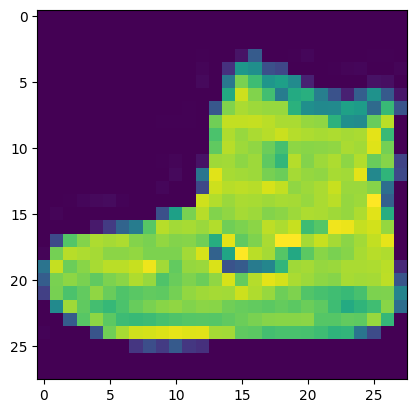

label [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


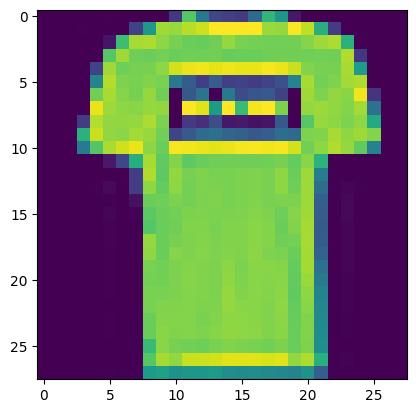

label [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


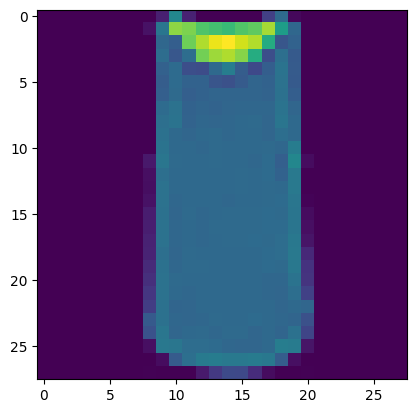

label [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


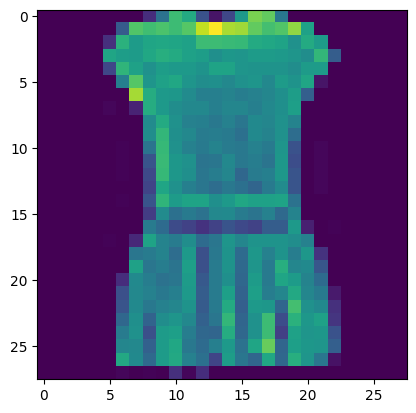

label [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


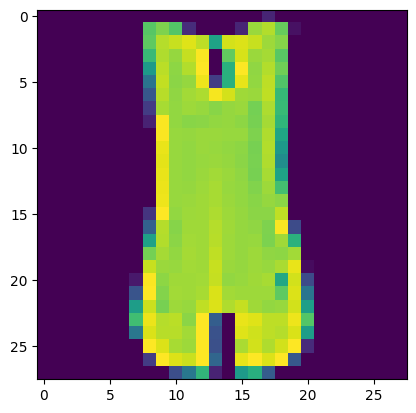

label [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


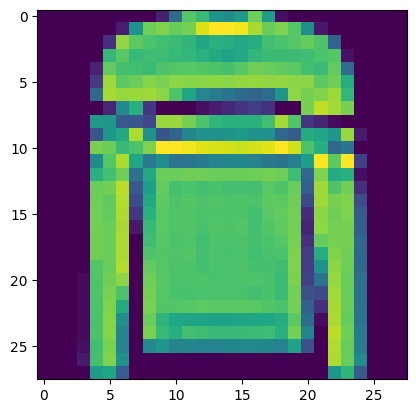

label [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


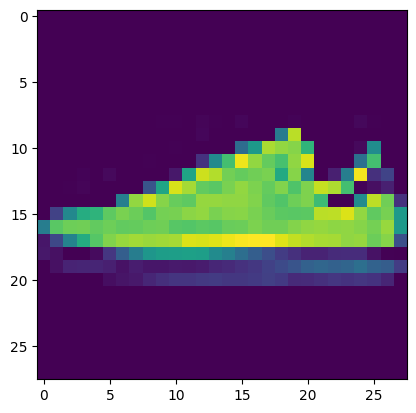

label [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


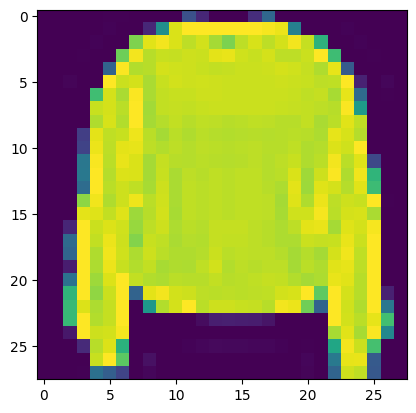

label [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


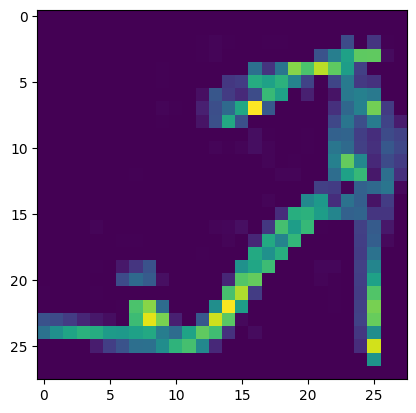

label [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


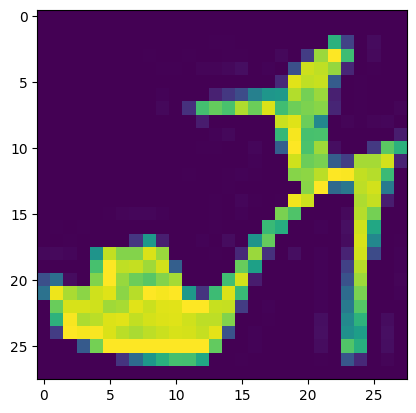

In [24]:
for i in range(10):
  print("label",y_train[i])
  plt.imshow(x_train[i])
  plt.show()

# checking the image size

In [8]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


# checking unique values

In [9]:
val =np.unique(y_train)
print(val)

[0 1 2 3 4 5 6 7 8 9]


# Normalization

In [10]:
def normalize_data(x_train,x_test):
  x_train = x_train/255
  x_test = x_test/255
  return x_train,x_test

In [11]:
x_train,x_test = normalize_data(x_train,x_test)

# converting labels into one hot encoding

In [12]:
def convert_labels(y_train,y_test):
  y_train = to_categorical(y_train,10)
  y_test = to_categorical(y_test,10)
  return y_train,y_test

In [13]:
y_train,y_test = convert_labels(y_train,y_test)

In [14]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

#model building

In [15]:
def model_building():
  model = Sequential()

  model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(128,(3,3),activation='relu'))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())
  model.add(Dense(128,activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(10,activation='softmax'))
  return model


In [16]:
model = model_building()

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,474 (431.54 KB)

 Trainable params: 110,474 (431.54 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [19]:
history = model.fit(x_train,y_train,epochs = 7,validation_data = (x_test,y_test),verbose=True)

Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 31ms/step - accuracy: 0.7057 - loss: 0.8126 - val_accuracy: 0.8350 - val_loss: 0.4500
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.8486 - loss: 0.4116 - val_accuracy: 0.8715 - val_loss: 0.3578
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.8784 - loss: 0.3378 - val_accuracy: 0.8698 - val_loss: 0.3460
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.8887 - loss: 0.3003 - val_accuracy: 0.8863 - val_loss: 0.3110
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.8987 - loss: 0.2692 - val_accuracy: 0.8883 - val_loss: 0.3099
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 32ms/step - accuracy: 0.9065 - loss: 0.2460 - val_accuracy: 0.8884 - val_loss: 0.3131
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9163 - loss: 0.2254 - val_accuracy: 0.8904 - val_loss: 0.3148


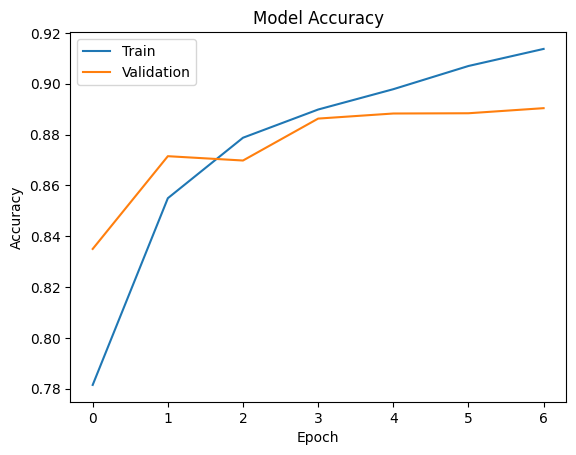

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [21]:
# Save the model
model.save('my_fashion_mnist_model.keras')


# model evaluation

In [22]:
def model_evaluation(model,x_test,y_test):
  loss,accuracy = model.evaluate(x_test,y_test)
  print(f'loss : {loss}')
  print(f'accuracy : {accuracy}')

# new data prediction

In [23]:
model_evaluation(model,x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8912 - loss: 0.3247
loss : 0.31483033299446106
accuracy : 0.8903999924659729


In [34]:
def model_prediction(model,test):
  y_pred = model.predict(test)
  y_pred = np.argmax(y_pred,axis=1)
  labels = {
      0: 'T-shirt/top',
      1: 'Trouser',
      2: 'Pullover',
      3: 'Dress',
      4: 'Coat',
      5: 'Sandal',
      6: 'Shirt',
      7: 'Sneaker',
      8: 'Bag',
      9: 'Ankle boot'
  }
  for prediction in y_pred:
    print(labels[prediction])

In [37]:
model_prediction(model,x_test[35].reshape(1,28,28,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
T-shirt/top
